In [1]:
from dataproc import (
    load_recording,
    load_sorting,
    merge_units_by_extremum_ch,
    compute_snrs_per_unit_group
)
from pathlib import Path

data_path = Path("datasets/ephy_testing_data/mearec/mearec_test_10s.h5")

# Load recording
recording = load_recording(data_path)

# Load sorting
sorting = load_sorting(data_path)


In [2]:
job_kwargs = dict(n_jobs=10, chunk_duration="1s", progress_bar=True)


Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/b8e229af71c99dd4cda647f37a2a8e00b7c66022d8fe1c2522329173d9290f65.npy
Benchmark results loaded
{'accuracy': 0.5310402684563759, 'precision': 0.5871985157699443, 'recall': 0.8473895582329317, 'group_accuracy': {2: 0.10452961672473868, 5: 0.25728155339805825, 6: 0.33972602739726027, 9: 0.2066115702479339, 12: 0.07039337474120083, 14: 0.07925407925407925, 19: 0.14982578397212543, 21: 0.3247422680412371, 22: 0.43641618497109824, 24: 0.20901639344262296}, 'group_precision': {2: 0.10452961672473868, 5: 0.25728155339805825, 6: 0.34444444444444444, 9: 0.2066115702479339, 12: 0.07083333333333333, 14: 0.0819277108433735, 19: 0.14982578397212543, 21: 0.4315068493150685, 22: 0.5, 24: 0.20901639344262296}, 'group_recall': {2: 1.0, 5: 1.0, 6: 0.9612403100775194, 9: 1.0, 12: 0.918918918918919, 14: 0.7083333333333334, 19: 1.0, 21: 0.5675675675675675, 22: 0.7743589743589744, 24: 1.0}, 'group_snr': {2: ([3], 21.85265), 5: ([0],

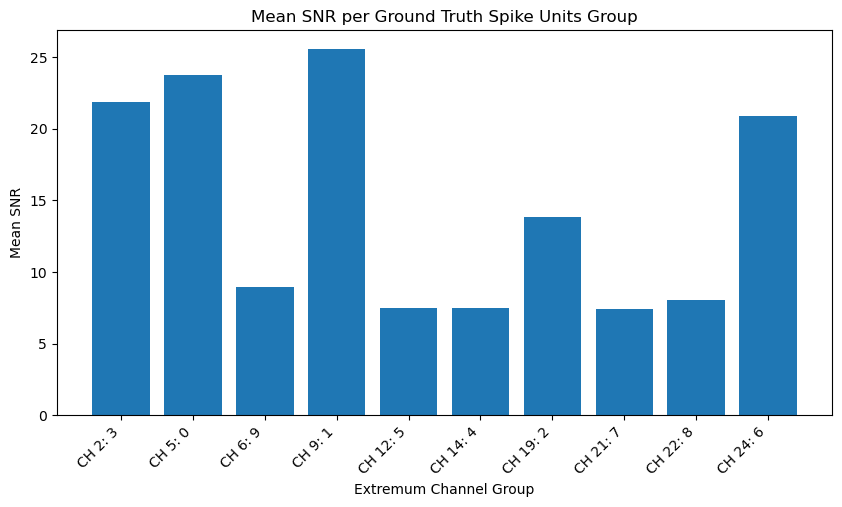

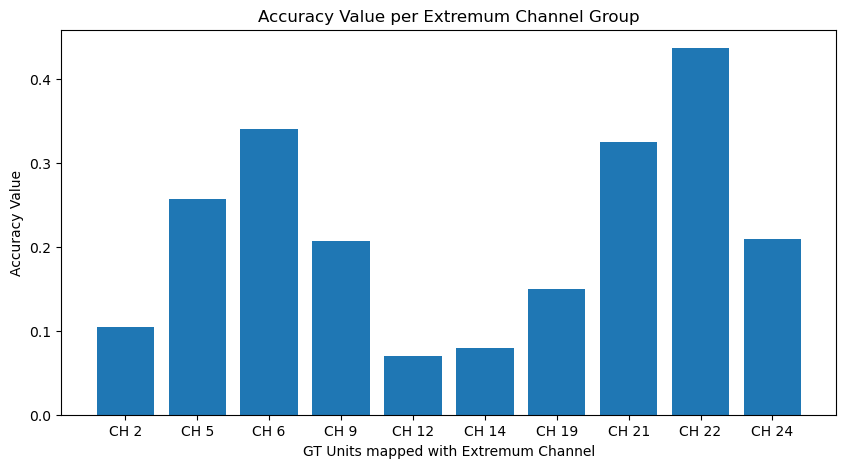

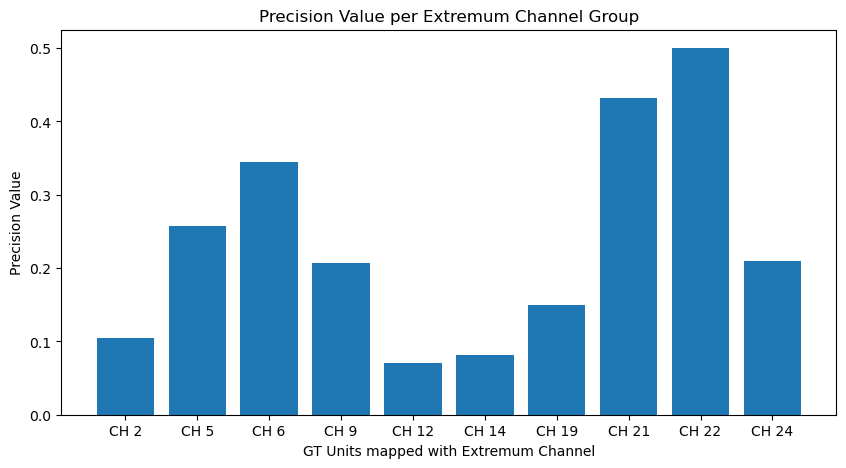

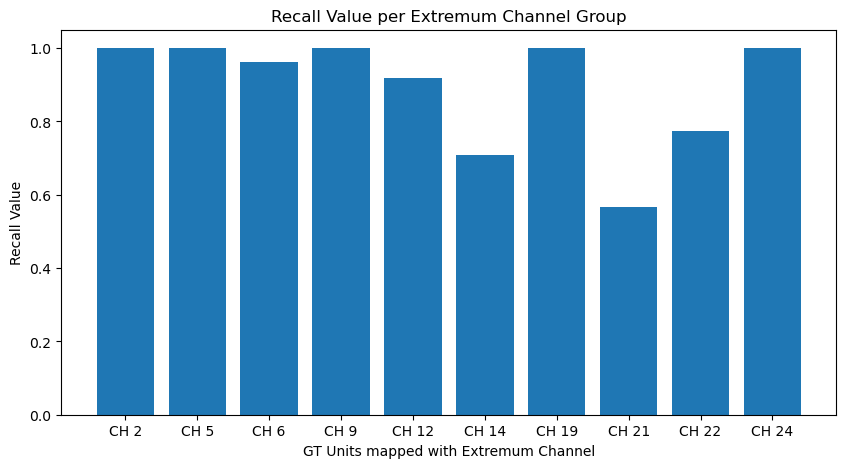

In [3]:
from benchmark import run_benchmark
from spikeinterface.sortingcomponents.peak_detection import detect_peaks
import spikeinterface as si


noise_levels = si.core.recording_tools.get_noise_levels(
    recording, return_scaled=False
)

detection_method = detect_peaks

detection_kwargs = dict(
    peak_sign="neg",
    detect_threshold=8,
    method="by_channel",
    exclude_sweep_ms=0.1,
    noise_levels=noise_levels
)

detection_config_kwargs = dict(
    save_on_disk=True,
    folder_path=Path("detection-results"),
    load_if_exists=True,
    overwrite=False,
    verbose=True
)

detection_job_kwargs = job_kwargs

# Merge units spike trains by extremum channel
extr_ch_to_units_trains, extr_ch_to_units_inds = merge_units_by_extremum_ch(
    recording=recording,
    sorting=sorting,
    job_kwargs=job_kwargs,
)

snr_per_unit_group = compute_snrs_per_unit_group(
    recording=recording,
    sorting=sorting,
    extremum_ch_to_units_inds=extr_ch_to_units_inds,
    job_kwargs=job_kwargs,
)

benchmark_config_kwargs = dict(
    search_radius=30,
    search_jitter=0.0003,
    progress_bar=True,
    verbose=True,
    save_on_disk=True,
    folder_path=Path("benchmark-results"),
    load_if_exists=True,
    overwrite=False,
    snr_per_unit_group=snr_per_unit_group,
)

benchmarking_log = run_benchmark(
    recording=recording,
    extr_ch_to_units_trains=extr_ch_to_units_trains,
    detection_method=detection_method,
    detection_kwargs=detection_kwargs,
    detection_config_kwargs=detection_config_kwargs,
    detection_job_kwargs=detection_job_kwargs,
    **benchmark_config_kwargs
)

print(benchmarking_log)

from metricsviz import plot_snrs_per_unit_group, plot_metric_per_extremum_channel
plot_snrs_per_unit_group(benchmarking_log["group_snr"])
plot_metric_per_extremum_channel(benchmarking_log["group_accuracy"], "Accuracy")
plot_metric_per_extremum_channel(benchmarking_log["group_precision"], "Precision")
plot_metric_per_extremum_channel(benchmarking_log["group_recall"], "Recall")

First stage optimization:
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/3e5ead5c9a8bb1729f9a81a8ca0bd9df1aa0bc7f8e11ef2d11251883033a6464.npy
Benchmark results loaded
Iteration 1/20: [8.57580090802163, 0.07751521847992458] -> 0.4250614250614251
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/db8309dc3e6bd63ab159efc8564be7c969765c417241ba0aab211a410f4355b6.npy
Benchmark results loaded
Iteration 2/20: [8.457837001909386, 0.13952752369197308] -> 0.5608247422680412
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/a8e87926b4f2883ec580225ee6aabd19bc9a678463996294f30a99a35c9177c7.npy
Benchmark results loaded
Iteration 3/20: [6.120829269975139, 0.06499623737270044] -> 0.2232196289646918
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/cec64662d67049924a95455d912ec79e776fb45cb37f3d2d5e7aafdc51aa3100.npy
Benchmark results loaded
Iteration 4/20: [6.214742243761071, 0.100056291670

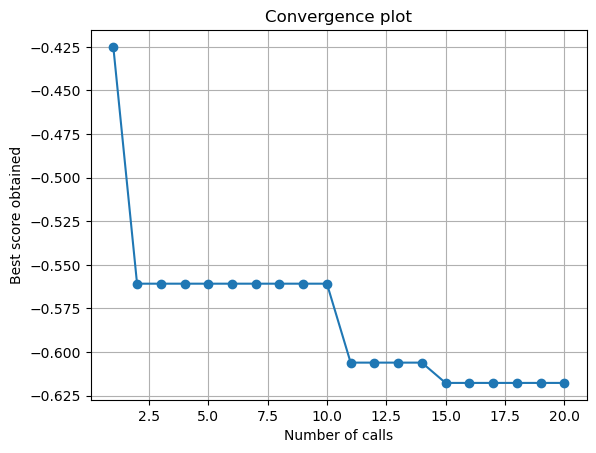

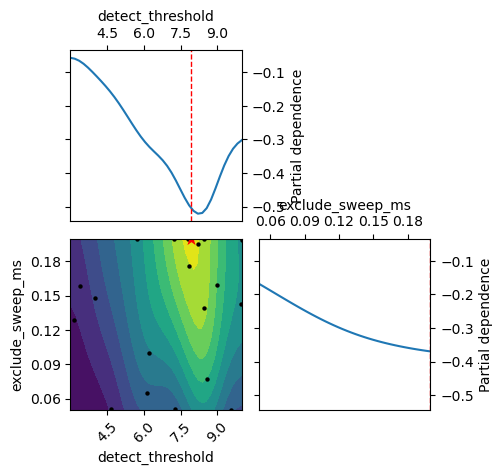

Second stage optimization:
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/dfa8a0981098eacad97a603087a7d5bc7c848dcb161b0b61d70f66daae579b39.npy
Benchmark results loaded
Iteration 1/20: ['pos'] -> 0.014161220043572984
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/d7a1401989f8b8be4bb16fbfbee24f988de4098f6c5e570464c0568867d451f1.npy
Benchmark results loaded
Iteration 2/20: ['both'] -> 0.5310965630114566
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/dfa8a0981098eacad97a603087a7d5bc7c848dcb161b0b61d70f66daae579b39.npy
Benchmark results loaded
Iteration 3/20: ['pos'] -> 0.014161220043572984
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded
Iteration 4/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f9

/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration 14/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded
Iteration 15/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded
Iteration 16/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded


/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration 17/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded
Iteration 18/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded
Iteration 19/20: ['neg'] -> 0.6177311725452812
Loading benchmark results from benchmark-results/mearec_test_10s/detect_peaks/f170c2e6669085b5f92d5752f496053532943cabf6400206138b08d1b25f0bf6.npy
Benchmark results loaded


/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/andrei/opt/miniconda3/envs/detectbench/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration 20/20: ['neg'] -> 0.6177311725452812
Best parameters (stage 2): ['neg'], Best score (stage 2): 0.6177311725452812
Combined best parameters: {'detect_threshold': 7.925818123176248, 'exclude_sweep_ms': 0.2, 'peak_sign': 'neg'}


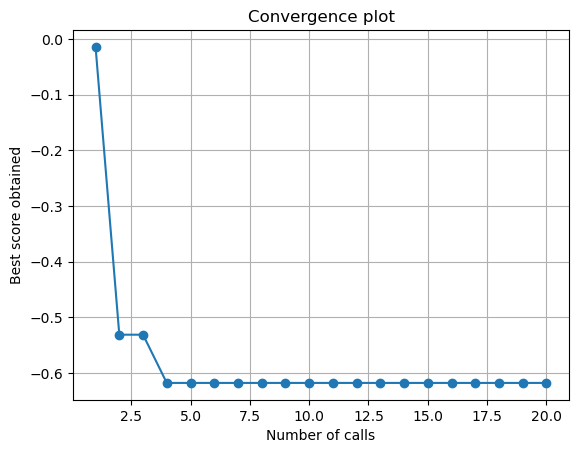

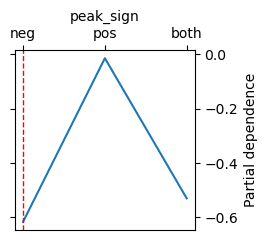

In [4]:
from optimise import DetectionOptimizer
from skopt.space import Real, Categorical, Integer
import warnings


warnings.filterwarnings(
    "ignore",
    message="`np.int` is a deprecated alias",
    category=DeprecationWarning,
)

detect_threshold_space = Real(
    3.0, 10.0, name="detect_threshold", prior="uniform"
)
exclude_sweep_ms_space = Real(
    0.05, 0.2, name="exclude_sweep_ms", prior="uniform"
)
peak_sign_space = Categorical(["neg", "pos", "both"], name="peak_sign")

# First set of hyperparameters
space1 = [detect_threshold_space, exclude_sweep_ms_space]

# Second set of hyperparameters
space2 = [peak_sign_space]

n_iterations = 20
early_stopping_tol = 0.001
early_stopping_patience = 10

optimizer = DetectionOptimizer(
    recording=recording,
    extr_ch_to_units_trains=extr_ch_to_units_trains,
    detection_method=detection_method,
    detection_kwargs=detection_kwargs,
    detection_config_kwargs=detection_config_kwargs,
    detection_job_kwargs=detection_job_kwargs,
    benchmark_config_kwargs=benchmark_config_kwargs,
)
# First stage optimization
print("First stage optimization:")
best_params1, best_score1 = optimizer.optimize(
    space=space1, 
    fixed_hyperparams={}, 
    n_iterations=n_iterations, 
    early_stopping_tol=early_stopping_tol, 
    early_stopping_patience=early_stopping_patience
)
print(
    f"Best parameters (stage 1): {best_params1}, Best score (stage 1): {abs(best_score1)}"
)

# Plot convergence and objective after the first stage optimization
optimizer.plot_convergence()
optimizer.plot_objective(space1)

# Second stage optimization
fixed_hyperparams = {
    dimension.name: value for dimension, value in zip(space1, best_params1)
}
print("Second stage optimization:")
best_params2, best_score2 = optimizer.optimize(
    space=space2,
    fixed_hyperparams=fixed_hyperparams,
    n_iterations=n_iterations,
    early_stopping_tol=early_stopping_tol,
    early_stopping_patience=early_stopping_patience,
)
print(
    f"Best parameters (stage 2): {best_params2}, Best score (stage 2): {abs(best_score2)}"
)

# Combine best parameters from both stages
best_params = {
    **fixed_hyperparams,
    **{
        dimension.name: value for dimension, value in zip(space2, best_params2)
    },
}
print(f"Combined best parameters: {best_params}")

# Plot convergence and objective after the second stage optimization
optimizer.plot_convergence()
optimizer.plot_objective(space2)
